# Deskripsi Proyek
Kamu bekerja di perusahaan tambang OilyGiant. Nah, tugasmu adalah mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru.

Untuk menyelesaikan tugas ini, kamu harus melakukan langkah-langkah berikut:
Baca file dengan parameter yang dikumpulkan dari sumur-sumur minyak di wilayah terpilih: kualitas minyak dan volume cadangannya;

Buat sebuah model untuk memprediksi volume cadangan di sumur-sumur baru;

Pilih sumur minyak yang memiliki nilai estimasi tertinggi;

Pilih wilayah dengan total keuntungan tertinggi dari sumur minyak yang dipilih.

Kamu punya data sampel minyak dari tiga wilayah. Parameter setiap sumur minyak di wilayah tersebut sudah diketahui. Buat sebuah model yang akan membantumu memilih wilayah dengan margin keuntungan tertinggi. 

## Import Library

In [52]:
# Import Library yang dibutuhkan

# Library untuk Data Processing
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split

# Library untuk data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Library untuk metrics
from sklearn.metrics import mean_squared_error

## Load dataset

In [3]:
# Memuat data
data0 = pd.read_csv ('/datasets/geo_data_0.csv')
data1 = pd.read_csv ('/datasets/geo_data_1.csv')
data2 = pd.read_csv ('/datasets/geo_data_2.csv')

In [6]:
# Melakukan pengecekan isi data
print('Geo data 0')
print(data0.head(5))
print('--------------------\n')
print('Geo data 1')
print(data1.head(5))
print('--------------------\n')
print('Geo data 2')
print(data2.head(5))
print('--------------------')

Geo data 0
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
--------------------

Geo data 1
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
--------------------

Geo data 2
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.

<div class="alert-info">
    
<b>Deskripsi data</b>

id — ID unik sumur minyak

f0, f1, f2 — tiga fitur titik wilayah (makna spesifiknya sebenarnya tidak penting, tetapi fitur itu sendiri sangat penting)

product — volume cadangan di dalam sumur minyak (1 unit = 1.000 barel).

</div>


## Data Quality Checking

In [8]:
# Melakukan pengecekan informasi data
print('Geo data 0')
data0.info()
print('------------------------------------\n')
print('Geo data 1')
data1.info()
print('------------------------------------\n')
print('Geo data 2')
data2.info()
print('------------------------------------')

Geo data 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------

Geo data 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------

Geo data 2
<class 'pandas.core.fra

<div class="alert-info">
<b>Note</b>

Tidak terdapat data yang hilang pada semua data geo.
    
    

</div>

In [10]:
# Cek duplikasi data
print('Geo data 0 \n', data0.duplicated().sum())
print('------------------------------------\n')
print('Geo data 1 \n', data1.duplicated().sum())
print('------------------------------------\n')
print('Geo data 2 \n', data2.duplicated().sum())
print('------------------------------------')

Geo data 0 
 0
------------------------------------

Geo data 1 
 0
------------------------------------

Geo data 2 
 0
------------------------------------


<div class="alert-info">
<b>Note</b>

Tidak terdapat data duplikat pada semua data geo.

    
    

</div>

## Analisis data eksploratif (EDA) 

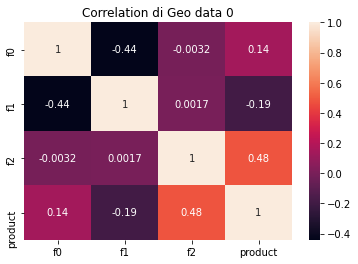

In [16]:
# Melakukan pengecekan Korelasi antara fiture dan target.

corr0 = data0.corr()
plt.title('Correlation di Geo data 0')
sns.heatmap(corr0, annot=True)
plt.show()

<div class="alert-info">
<b>Note</b>

- F0 dan F1, Memiliki korelasi yang lemah terhadap produk / Target
- F2, Memiliki Korelasi sedang terhadap produk / Target
    
    

</div>

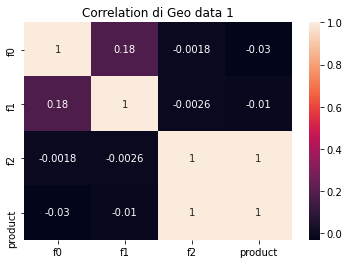

In [17]:
# Melakukan pengecekan Korelasi antara fiture dan target.

corr1 = data1.corr()
plt.title('Correlation di Geo data 1')
sns.heatmap(corr1, annot=True)
plt.show()

<div class="alert-info">
<b>Note</b>

- F0 dan F1, Memiliki korelasi yang lemah terhadap produk / Target
- F2, Memiliki Korelasi yang sangat kuat terhadap produk / Target
    
    

</div>

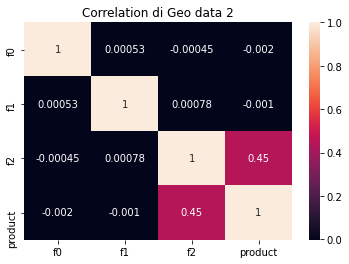

In [18]:
# Melakukan pengecekan Korelasi antara fiture dan target.

corr2 = data2.corr()
plt.title('Correlation di Geo data 2')
sns.heatmap(corr2, annot=True)
plt.show()

<div class="alert-info">
<b>Note</b>

- F0 dan F1, Memiliki korelasi yang lemah terhadap produk / Target
- F2, Memiliki Korelasi sedang terhadap produk / Target
    
    

</div>

## Model Creation

In [32]:
# Membuat function Mean Absolute Percentage Error (MAPE)
def mape(y_actual, y_predict):
    metric = pd.Series(abs(y_actual - y_predict) / y_actual).replace(np.inf, 0).mean() * 100
    return metric

In [106]:
# Membuat function model, hasil RSME dan MAPE
def create_model(dataframe, model, data_ke):
    # Pisahkan X dan y
    feature = dataframe[['f0', 'f1', 'f2']]
    target = dataframe['product']

    # Train Test Split
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.25, random_state=10)


    # Prediksi Data
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Evaluasi Metrics dari Model
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Print RMSE
    print('Geo Data ke', data_ke, '----------------------')
    print('RMSE Train   :', round(rmse_train, 2))
    print('RMSE Test    :', round(rmse_test, 2))
    # Print MAPE
    print('MAPE Train   :', round(mape(y_train, y_pred_train), 2), '%')
    print('MAPE Test    :', round(mape(y_test, y_pred_test), 2), '%')

    # Rata2 Volume Minyak yang terprediksi
    mean_volume = y_pred_test.mean()
    print('Volume Minyak:', round(mean_volume, 2))

    result = pd.DataFrame({'actual': y_test, 'predict': y_pred_test})

    return result

### LinearRegression


In [63]:
# Membuat Model Linear Regression
lr = LinearRegression()

In [107]:
# Predict data ke 0
result0 = create_model(dataframe=data0, model=lr, data_ke=0)

# Predict data ke 1
result1 = create_model(dataframe=data1, model=lr, data_ke=1)

# Predict data ke 2
result2 = create_model(dataframe=data2, model=lr, data_ke=2)

Geo Data ke 0 ----------------------
RMSE Train   : 37.64
RMSE Test    : 37.85
MAPE Train   : 147.33 %
MAPE Test    : 245.61 %
Volume Minyak: 92.41
Geo Data ke 1 ----------------------
RMSE Train   : 0.89
RMSE Test    : 0.89
MAPE Train   : 2.86 %
MAPE Test    : 2.82 %
Volume Minyak: 68.83
Geo Data ke 2 ----------------------
RMSE Train   : 40.06
RMSE Test    : 40.05
MAPE Train   : 200.68 %
MAPE Test    : 237.09 %
Volume Minyak: 94.96


<div class="alert-info">
<b>Insight</b>

- rata-rata Volume minyak terbanyak terdapat pada Geo Data 2, Namun memiliki RSME yang paling besar.
- RMSE yang paling kecil terdapat pada Geo data 1, namun memiliki rata-rata volume minyak terkecil.
    
    

</div>

### Ridge

In [60]:
# Membuat Model Ridge
ridge = Ridge()

In [61]:
# Predict data ke 0
result0_ridge = create_model(dataframe=data0, model=ridge, data_ke=0)

# Predict data ke 1
result1_ridge = create_model(dataframe=data1, model=ridge, data_ke=1)

# Predict data ke 2
result2_ridge = create_model(dataframe=data2, model=ridge, data_ke=2)

Data ke 0 ----------------------
RMSE Train   : 37.64
RMSE Test    : 37.85
MAPE Train   : 147.33 %
MAPE Test    : 245.61 %
Volume Minyak: 92.41
Data ke 1 ----------------------
RMSE Train   : 0.89
RMSE Test    : 0.89
MAPE Train   : 2.86 %
MAPE Test    : 2.82 %
Volume Minyak: 68.83
Data ke 2 ----------------------
RMSE Train   : 40.06
RMSE Test    : 40.05
MAPE Train   : 200.68 %
MAPE Test    : 237.09 %
Volume Minyak: 94.96


<div class="alert-info">
<b>Insight</b>

Hasilnya sama persis dengan model Linier Regression    
- rata-rata Volume minyak terbanyak terdapat pada Geo Data 2, Namun memiliki RSME yang paling besar.
- RMSE yang paling kecil terdapat pada Geo data 1, namun memiliki rata-rata volume minyak terkecil.
    
    

</div>

## Model Valuation

In [65]:
# Benchmark
anggaran    = 100000000
pendapatan  = 4500
sumur       = 200

### Perhitungan Keuntungan / Laba

In [67]:
cost_sumur  = anggaran / sumur
min_barrel  = cost_sumur / pendapatan
print('Minimum Pendapatan per Sumur       : $', round(cost_sumur, 2))
print('Minimum Volume Minyak yg dihasilkan:', round(min_barrel, 2), ' ribu barrels')

Minimum Pendapatan per Sumur       : $ 500000.0
Minimum Volume Minyak yg dihasilkan: 111.11  ribu barrels


In [116]:
def revenue(dataframe):
    pred_sorted = dataframe.sort_values(by='predict', ascending=False).head(200)
    selected = pred_sorted['actual'].sum()
    revenue = selected * 4500 - 100000000
    return revenue

In [117]:
def bootstrap_revenue(dataframe, bootstrap=1000):
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(bootstrap):
        target_sample = dataframe.sample(n=500, replace=True, random_state=state)
        target_sample_revenue = revenue(target_sample)
        values.append(target_sample_revenue)
    
    return pd.Series(values)

In [124]:
def profit(data, percobaan=1000):
    boot = bootstrap_revenue(dataframe=data, bootstrap=percobaan)
    confidence_inteval = 0.95
    alpha = 1 - confidence_inteval
    min = int(boot.quantile(alpha/2))
    max = int(boot.quantile(1-alpha/2))
    avg = int(boot.mean())
    risk = round((boot < 0).mean() * 100, 2)
    
    print(f'Range Confidence : $({min}) - $({max})')
    print(f'Rata-rata Profit : ${avg}')
    print(f'Risiko Kerugian  : {risk}%')

In [125]:
print('Result Geo data 0')
profit(data=result0_lr)
print('------------------- \n')

print('Result Geo data 1')
profit(data=result1_lr)
print('------------------- \n')


print('Result Geo data 2')
profit(data=result2_lr)
print('-------------------')

Result Geo data 0
Range Confidence : $(-1302336) - $(8935740)
Rata-rata Profit : $3773683
Risiko Kerugian  : 8.1%
------------------- 

Result Geo data 1
Range Confidence : $(907582) - $(8829726)
Rata-rata Profit : $4732811
Risiko Kerugian  : 1.5%
------------------- 

Result Geo data 2
Range Confidence : $(-1734909) - $(9166356)
Rata-rata Profit : $3603957
Risiko Kerugian  : 9.0%
-------------------


<div class="alert-info">
<b>Insight</b>

Hasilnya sama persis dengan model Linier Regression    
- rata-rata Volume minyak terbanyak terdapat pada Geo Data 2, Namun memiliki RSME yang paling besar.
- RMSE yang paling kecil terdapat pada Geo data 1, namun memiliki rata-rata volume minyak terkecil.
    
    

</div>